In [1]:
import sys
sys.path.append('../../MembraneQuant')
from membranequant import *
import seaborn as sns
%matplotlib notebook

In [29]:
path = '/Users/blandt/Desktop/Data/Rundowns/PH rundown August 2019'
paths = direcslist(path, 1)
lines = [p.strip('/').split('/')[-2].split('_')[1] for p in paths]
imgs = [load_image(p + '/af_corrected.tif') for p in paths]
rois = [np.loadtxt(p + '/ROI_fit.txt') for p in paths]

In [60]:
df = pd.read_csv('df.csv')
df_ph = df[df.Line == 'od58']
df_n2 = df[df.Line == 'n2'] 
df_ph

,Frame,Path,Line,Condition,Membrane,Cytoplasm,Dosage
7,7,/Users/blandt/Desktop/Data/Rundowns/PH rundown...,od58,1908081030xfp,277.748232,285.177261,392.434500
8,8,/Users/blandt/Desktop/Data/Rundowns/PH rundown...,od58,1908081030xfp,49.567477,90.584978,105.547839
9,9,/Users/blandt/Desktop/Data/Rundowns/PH rundown...,od58,1908081030xfp,291.079947,327.840162,434.504331
10,10,/Users/blandt/Desktop/Data/Rundowns/PH rundown...,od58,1908081030xfp,156.395220,191.839654,246.703977
11,11,/Users/blandt/Desktop/Data/Rundowns/PH rundown...,od58,1908081030xfp,241.731386,233.456350,327.116566
12,12,/Users/blandt/Desktop/Data/Rundowns/PH rundown...,od58,1908081030xfp,285.713437,290.562793,403.242006
13,13,/Users/blandt/Desktop/Data/Rundowns/PH rundown...,od58,1908081030xfp,215.249965,230.843271,313.495923
14,14,/Users/blandt/Desktop/Data/Rundowns/PH rundown...,od58,1908081030xfp,171.557244,228.344534,283.745455
15,15,/Users/blandt/Desktop/Data/Rundowns/PH rundown...,od58,1908081030xfp,220.548114,165.045984,266.204086
16,16,/Users/blandt/Desktop/Data/Rundowns/PH rundown...,od58,1908081030xfp,126.997246,159.554908,204.615243


### Images

<IPython.core.display.Javascript object>


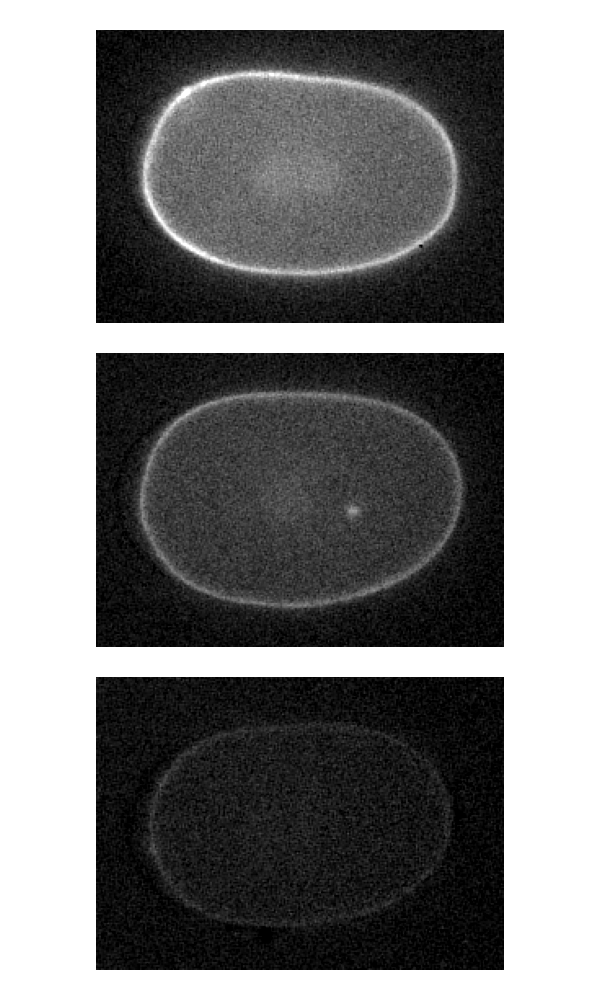

In [156]:
selected_images = [28, 27, 16]

def func(ax, path):
    img = load_image(path + '/af_corrected.tif')
    roi = np.loadtxt(path + '/ROI.txt')
    rotated = rotated_embryo(img, roi, 250, 180, 3)
    ax.imshow(rotated, cmap='gray', vmin=0, vmax=2000)
    ax.axis('off')
    
fig, ax = plt.subplots(3, 1)
func(ax[0], df_ph.Path[selected_images[0]])
func(ax[1], df_ph.Path[selected_images[1]])
func(ax[2], df_ph.Path[selected_images[2]])
fig.set_size_inches(3, 5)
fig.tight_layout()

<IPython.core.display.Javascript object>


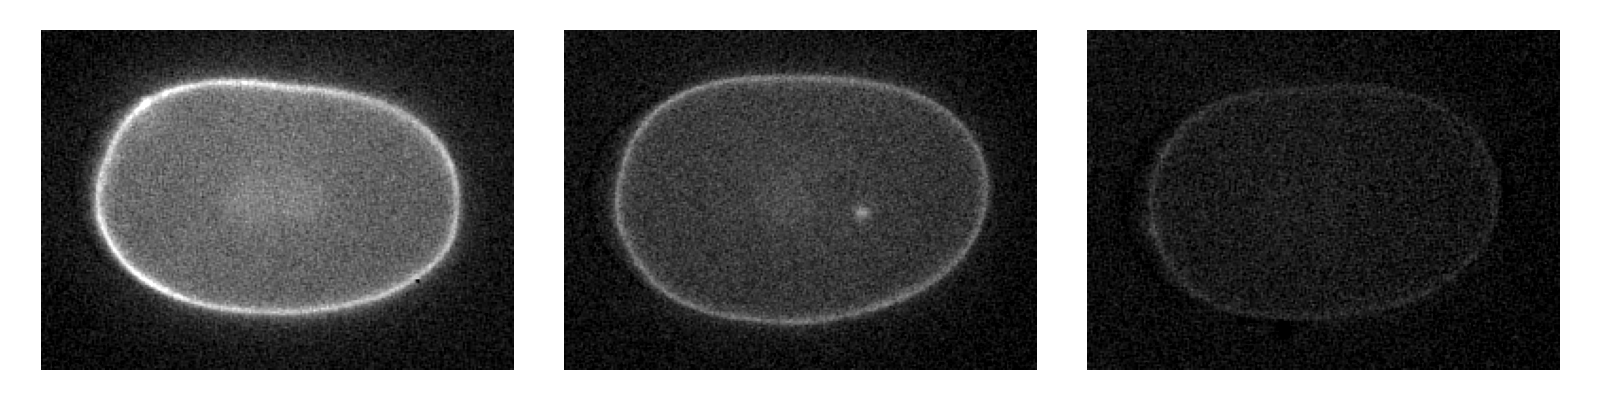

In [159]:
def func(ax, path):
    img = load_image(path + '/af_corrected.tif')
    roi = np.loadtxt(path + '/ROI.txt')
    rotated = rotated_embryo(img, roi, 250, 180, 3)
    ax.imshow(rotated, cmap='gray', vmin=0, vmax=2000)
    ax.axis('off')
    
fig, ax = plt.subplots(1, 3)
func(ax[0], df_ph.Path[selected_images[0]])
func(ax[1], df_ph.Path[selected_images[1]])
func(ax[2], df_ph.Path[selected_images[2]])
fig.set_size_inches(8, 2)
fig.tight_layout()
fig.savefig('Figs/images.png', dpi=600, transparent=True)

### Cyt vs mem

<IPython.core.display.Javascript object>


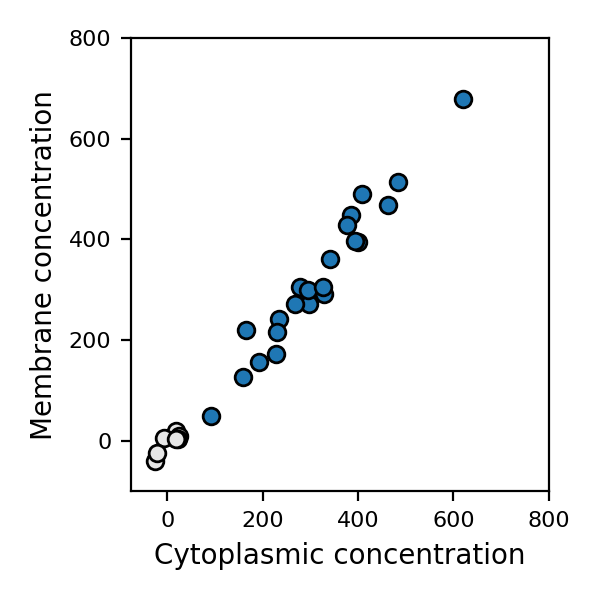

In [75]:
fig, ax = plt.subplots()
ax.scatter(df_ph.Cytoplasm, df_ph.Membrane, facecolors='tab:blue', edgecolors='k')
ax.scatter(df_n2.Cytoplasm, df_n2.Membrane, facecolors='0.9', edgecolors='k')
ax.set_xlim(right=800)
ax.set_ylim(top=800)
ax.tick_params(axis='both', labelsize=8)
ax.set_xlabel('Cytoplasmic concentration')
ax.set_ylabel('Membrane concentration')
fig.set_size_inches(3,3)
fig.tight_layout()

<IPython.core.display.Javascript object>


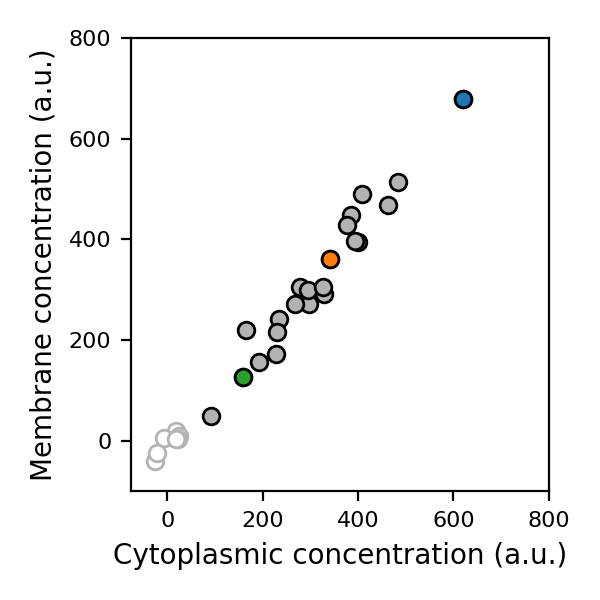

In [153]:
fig, ax = plt.subplots()
ax.scatter(df_ph.Cytoplasm, df_ph.Membrane, facecolors='0.7', edgecolors='k')
ax.scatter(df_n2.Cytoplasm, df_n2.Membrane, facecolors='w', edgecolors='0.7')

ax.scatter(df_ph.Cytoplasm[selected_images[0]], df_ph.Membrane[selected_images[0]], 
           facecolors='tab:blue', edgecolors='k')
ax.scatter(df_ph.Cytoplasm[selected_images[1]], df_ph.Membrane[selected_images[1]], 
           facecolors='tab:orange', edgecolors='k')
ax.scatter(df_ph.Cytoplasm[selected_images[2]], df_ph.Membrane[selected_images[2]], 
           facecolors='tab:green', edgecolors='k')

ax.set_xlim(right=800)
ax.set_ylim(top=800)
ax.tick_params(axis='both', labelsize=8)
ax.set_xlabel('Cytoplasmic concentration (a.u.)')
ax.set_ylabel('Membrane concentration (a.u.)')
fig.set_size_inches(3,3)
fig.tight_layout()
fig.savefig('Figs/cyt_vs_mem.png', dpi=600, transparent=True)

### Profiles

In [116]:
straights = [straighten(i, r, 50, ninterp=500) for i, r, l in zip(imgs, rois, lines) if l == 'od58']
profiles = [np.mean(s, axis=1) for s in straights]
indices = df_ph.Frame.to_list()
dosages = df_ph.Dosage.to_list()

orders = np.argsort(np.array(df_ph.Dosage))[::-1]
indices_sorted = [indices[o] for o in orders]
dosages_sorted = [dosages[o] for o in orders]
profiles_sorted = [profiles[o] for o in orders]

<IPython.core.display.Javascript object>


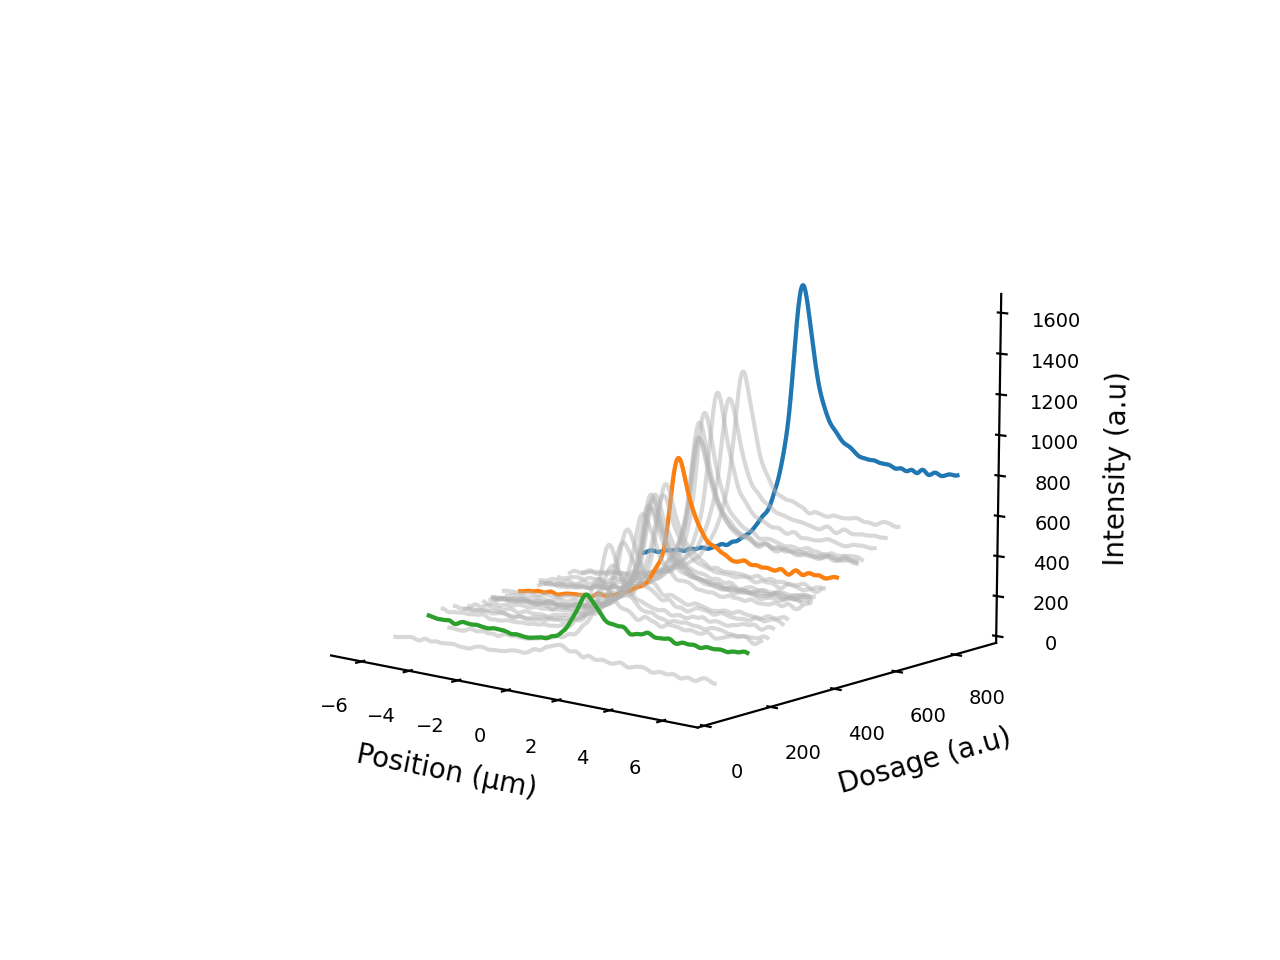

In [154]:
fig = plt.figure()
ax = plt.axes(projection='3d')

x = np.linspace(- 25 * 0.255, 25 * 0.255, 500)
for i, d, p in zip(indices_sorted, dosages_sorted, profiles_sorted):
    if d < 1000:
        ax.plot3D(x, d * np.ones([500]), p, c='0.7', alpha=0.5)
        
    if i == selected_images[0]:
        ax.plot3D(x, d * np.ones([500]), p, c='tab:blue')
    if i == selected_images[1]:
        ax.plot3D(x, d * np.ones([500]), p, c='tab:orange')
    if i == selected_images[2]:
        ax.plot3D(x, d * np.ones([500]), p, c='tab:green')

ax.grid(False)
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.set_xlabel('Position (μm)')
ax.set_ylabel('Dosage (a.u)')
ax.set_zlabel('Intensity (a.u)')
ax.set_zlim(bottom=0)
ax.set_ylim(bottom=0)
ax.view_init(elev=10, azim=310)
ax.tick_params(axis='both', labelsize=7)
fig.savefig('Figs/profiles_3d.png', dpi=600, transparent=True)

In [120]:
# fig = plt.figure()
# ax = plt.axes(projection='3d')

# x = np.linspace(- 25 * 0.255, 25 * 0.255, 500)
# for d, p in zip(df_ph.Dosage, profiles):
#     if d < 1000:
#         ax.plot3D(x, d * np.ones([500]), p, c='k')
        
# ax.grid(False)
# ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# ax.tick_params(axis='both', labelsize=8)
# ax.set_xlabel('Position')
# ax.set_ylabel('Dosage')
# ax.set_zlabel('Intensity')

In [160]:
# fig, ax = plt.subplots()

# x = np.linspace(- 25 * 0.255, 25 * 0.255, 500)
# for i, d, p in zip(indices_sorted, dosages_sorted, profiles_sorted):
#     if d < 1000:
#         ax.plot(x, p, c='0.7', alpha=0.5)
        
#     if i == selected_images[0]:
#         ax.plot(x, p, c='tab:blue')
#     if i == selected_images[1]:
#         ax.plot(x, p, c='tab:orange')
#     if i == selected_images[2]:
#         ax.plot(x, p, c='tab:green')

# ax.set_xlabel('Position (μm)')
# ax.set_ylabel('Intensity (a.u)')
# ax.set_ylim(bottom=0)
# ax.tick_params(axis='both', labelsize=8)
# fig.set_size_inches(3,3)
# fig.tight_layout()